<a href="https://colab.research.google.com/github/Jab-11/SwiftMark/blob/main/FaceReconModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# suppress display of warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Get the directory containing Haar cascade files
cascade_dir = cv2.data.haarcascades

# Path to the Haar cascade file for frontal face detection
cascade_file = os.path.join(cascade_dir, '/content/drive/MyDrive/GDFiles/DE-FaceRec/haarcascade_frontalface_default.xml')

# Check if the cascade file exists
if os.path.isfile(cascade_file):
    print("Haar cascade file found:", cascade_file)
else:
    print("Haar cascade file not found. Downloading...")
    cv2_base_url = "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/"
    cascade_url = cv2_base_url + 'haarcascade_frontalface_default.xml'
    os.system(f"wget {cascade_url} -P {cascade_dir}")
    print("Haar cascade file downloaded successfully.")

# Now, you can use cascade_file as the filter_path in your code.
filter_path = cascade_file

Haar cascade file found: /content/drive/MyDrive/GDFiles/DE-FaceRec/haarcascade_frontalface_default.xml


In [ ]:
# Function to detect faces and crop them from an image
def detect_and_crop_faces(image):
    face_cascade = cv2.CascadeClassifier(filter_path)
    faces = face_cascade.detectMultiScale(image, 1.3, 5)
    cropped_faces = []
    for (x, y, w, h) in faces:
        cropped_faces.append(image[y:y+h, x:x+w])
    return cropped_faces

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Path to the dataset directory
dataset_dir = "/content/drive/MyDrive/GDFiles/DE-FaceRec/dataset"
# Path to store the cropped images
cropped_dataset_dir = "/content/drive/MyDrive/GDFiles/DE-FaceRec/CroppedDataset"
# Path to store the split train and test sets
train_dir = os.path.join(cropped_dataset_dir, "train")
test_dir = os.path.join(cropped_dataset_dir, "test")

print(train_dir)
print(test_dir)

/content/drive/MyDrive/GDFiles/DE-FaceRec/CroppedDataset/train
/content/drive/MyDrive/GDFiles/DE-FaceRec/CroppedDataset/test


In [ ]:
# Create directories for train and test sets
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Common size to which all face images will be resized
common_size = (128, 128)

# Iterate through each subdirectory (each person's folder)
for subdir in os.listdir(dataset_dir):
    subdir_path = os.path.join(dataset_dir, subdir)
    if os.path.isdir(subdir_path):
        # Create corresponding subdirectories in train and test folders
        train_subdir_path = os.path.join(train_dir, subdir)
        test_subdir_path = os.path.join(test_dir, subdir)
        os.makedirs(train_subdir_path, exist_ok=True)
        os.makedirs(test_subdir_path, exist_ok=True)

        # Get the list of image files in the subdirectory
        image_files = [f for f in os.listdir(subdir_path) if f.endswith('.jpg')]

        # Iterate through each image in the subdirectory
        for image_name in image_files:
            image_path = os.path.join(subdir_path, image_name)
            # Read the image
            img = cv2.imread(image_path)
            # Detect and crop faces from the image (function detect_and_crop_faces to be defined)
            faces = detect_and_crop_faces(img)
            # Resize each face to a common size before appending to the list
            for idx, face in enumerate(faces):
                if face is not None:
                    resized_face = cv2.resize(face, common_size)
                    # Decide whether to put the image in train or test set
                    if np.random.rand() < 0.9:  # 90% train, 10% test
                        save_path = os.path.join(train_subdir_path, f"{image_name}_{idx}.jpg")
                    else:
                        save_path = os.path.join(test_subdir_path, f"{image_name}_{idx}.jpg")
                    # Save the cropped face image
                    cv2.imwrite(save_path, resized_face)
print('dataset created')

dataset created


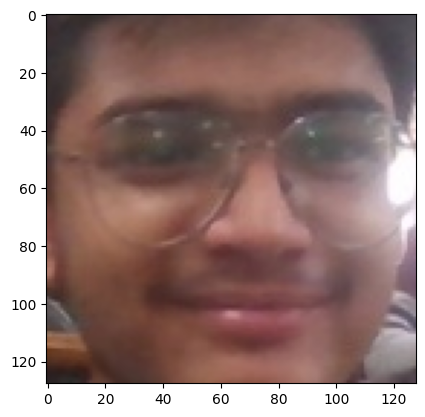

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
img = mpimg.imread('/content/drive/MyDrive/GDFiles/DE-FaceRec/CroppedDataset/train/Divy/16.jpg_0.jpg')
imgplot = plt.imshow(img)

In [ ]:
!pip install anytree

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 1.4 MB/s eta 0:00:00


In [ ]:
import os
from anytree import Node, RenderTree

def create_directory_tree(root_path, parent=None):
    """
    Recursively create a directory tree structure using AnyTree.
    """
    node = Node(os.path.basename(root_path), parent=parent)
    if os.path.isdir(root_path):
        for item in sorted(os.listdir(root_path)):
            item_path = os.path.join(root_path, item)
            create_directory_tree(item_path, parent=node)

def print_directory_tree(root_path):
    """
    Print the directory tree structure using AnyTree.
    """
    root = Node(os.path.basename(root_path))
    create_directory_tree(root_path, root)
    for pre, _, node in RenderTree(root):
        print("%s%s" % (pre, node.name))

# Define the root directory
root_dir = "/content/drive/MyDrive/GDFiles/DE-FaceRec/CroppedDataset"

# Print the directory tree
print_directory_tree(root_dir)

CroppedDataset
└── CroppedDataset
    ├── test
    │   ├── Dev
    │   │   ├── 2.jpg_0.jpg
    │   │   ├── 25.jpg_0.jpg
    │   │   ├── 28.jpg_0.jpg
    │   │   ├── 29.jpg_0.jpg
    │   │   ├── 33.jpg_0.jpg
    │   │   ├── 62.jpg_0.jpg
    │   │   ├── 78.jpg_0.jpg
    │   │   └── 88.jpg_0.jpg
    │   ├── Divy
    │   │   └── 67.jpg_0.jpg
    │   ├── Divyakumar
    │   ├── Jabarson
    │   │   ├── 100.jpg_0.jpg
    │   │   ├── 21.jpg_0.jpg
    │   │   └── 91.jpg_0.jpg
    │   └── Mayur
    │       ├── 54.jpg_0.jpg
    │       ├── 57.jpg_0.jpg
    │       └── 69.jpg_0.jpg
    └── train
        ├── Dev
        │   ├── 1.jpg_0.jpg
        │   ├── 10.jpg_0.jpg
        │   ├── 11.jpg_0.jpg
        │   ├── 12.jpg_0.jpg
        │   ├── 13.jpg_0.jpg
        │   ├── 14.jpg_0.jpg
        │   ├── 15.jpg_0.jpg
        │   ├── 16.jpg_0.jpg
        │   ├── 17.jpg_0.jpg
        │   ├── 18.jpg_0.jpg
        │   ├── 19.jpg_0.jpg
        │   ├── 20.jpg_0.jpg
        │   ├── 21.jpg_0.jpg
        │   ├── 2

In [ ]:
train_dir = '/content/drive/MyDrive/GDFiles/DE-FaceRec/CroppedDataset/train'
test_dir = '/content/drive/MyDrive/GDFiles/DE-FaceRec/CroppedDataset/test'

# Using ImageDataGenerator for data augmentation
generator = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1  # 10% of the data will be used for validation
)

# Load and split the data into training and validation sets
train_ds = generator.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    subset="training"  # This is for training data
)

val_ds = generator.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    subset="validation"  # This is for validation data
)

# Get the list of classes
classes = list(train_ds.class_indices.keys())
print("Classes in training data:", classes)
num_classes = len(classes)
print(num_classes)

# Load test data
test_ds = generator.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    subset="training"  # This is for test data
)

# Get the list of classes in test data
test_classes = list(test_ds.class_indices.keys())
print("Classes in test data:", test_classes)

Found 239 images belonging to 5 classes.
Found 23 images belonging to 5 classes.
Classes in training data: ['Dev', 'Divy', 'Divyakumar', 'Jabarson', 'Mayur']
5
Found 15 images belonging to 5 classes.
Classes in test data: ['Dev', 'Divy', 'Divyakumar', 'Jabarson', 'Mayur']


In [ ]:
import tensorflow as tf
from keras.models import Model
from keras.layers import Flatten, Dense
from keras.applications import VGG16

# Check if GPU is available
gpus = tf.config.list_physical_devices('GPU')
if not gpus:
    print("No GPU device found.")

# Set memory growth for each GPU
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# Importing the libraries from tensorflow.keras
from keras.models import Model
from keras.layers import Flatten, Dense
from keras.applications import VGG16

IMAGE_SIZE = [128, 128]  # We will keep the image size as (128,128).

# Loading the weights of VGG16 without the top layer. These weights are trained on the ImageNet dataset.
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# Exclude the initial layers from the training phase as they have already been trained.
for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)
#x = Dense(128, activation='relu')(x)  # We can add a new fully connected layer, but it will increase the execution time.
x = Dense(num_classes, activation='softmax')(x)  # Adding the output layer with softmax function as this is a multi-label classification problem.

model = Model(inputs=vgg.input, outputs=x)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print("Model created successfully.")

model.summary()

No GPU device found.
Model created successfully.
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_po

In [ ]:
BATCH_SIZE = 16
history = model.fit(train_ds, epochs=10, validation_data=val_ds, batch_size=BATCH_SIZE)

train_loss, train_accuracy = model.evaluate(train_ds)
print(f"Training Accuracy: {train_accuracy*100: .2f}")

val_loss, val_accuracy = model.evaluate(val_ds)
print(f"Validation Accuracy: {val_accuracy*100: .2f}")

Epoch 1/10
8/8 [==============================] - 60s 7s/step - loss: 1.1925 - accuracy: 0.5230 - val_loss: 0.7552 - val_accuracy: 0.4783
Epoch 2/10
8/8 [==============================] - 54s 7s/step - loss: 0.5388 - accuracy: 0.8577 - val_loss: 0.3192 - val_accuracy: 0.9565
Epoch 3/10
8/8 [==============================] - 55s 7s/step - loss: 0.2815 - accuracy: 0.9623 - val_loss: 0.1942 - val_accuracy: 0.9565
Epoch 4/10
8/8 [==============================] - 55s 7s/step - loss: 0.1723 - accuracy: 0.9874 - val_loss: 0.2227 - val_accuracy: 1.0000
Epoch 5/10
8/8 [==============================] - 66s 8s/step - loss: 0.1323 - accuracy: 0.9833 - val_loss: 0.1303 - val_accuracy: 0.9565
Epoch 6/10
8/8 [==============================] - 54s 7s/step - loss: 0.0835 - accuracy: 0.9833 - val_loss: 0.1062 - val_accuracy: 1.0000
Epoch 7/10
8/8 [==============================] - 57s 7s/step - loss: 0.0587 - accuracy: 1.0000 - val_loss: 0.1046 - val_accuracy: 1.0000
Epoch 8/10
8/8 [==================

In [ ]:
# Evaluate the model on the test set
test_ds = generator.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    subset="validation"  # Use a portion of the data for testing
)

test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Accuracy: {test_accuracy*100: .2f}")

Found 23 images belonging to 5 classes.
1/1 [==============================] - 5s 5s/step - loss: 0.0486 - accuracy: 1.0000
Test Accuracy:  100.00


In [ ]:
model.save('/content/drive/MyDrive/GDFiles/DE-FaceRec/face_recog_vgg_v2.h5')

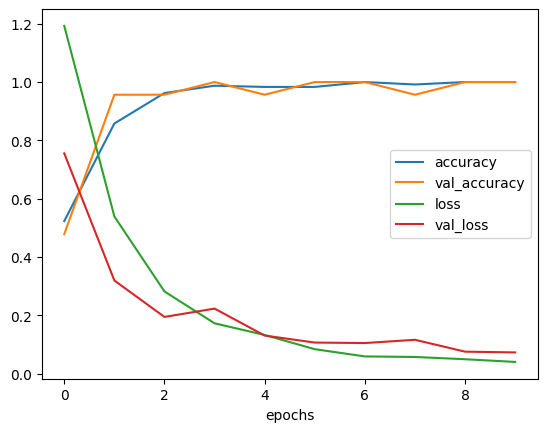

In [ ]:
# Plot the training and validation accuracy and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.legend(['accuracy', 'val_accuracy', 'loss', 'val_loss'])
plt.show()

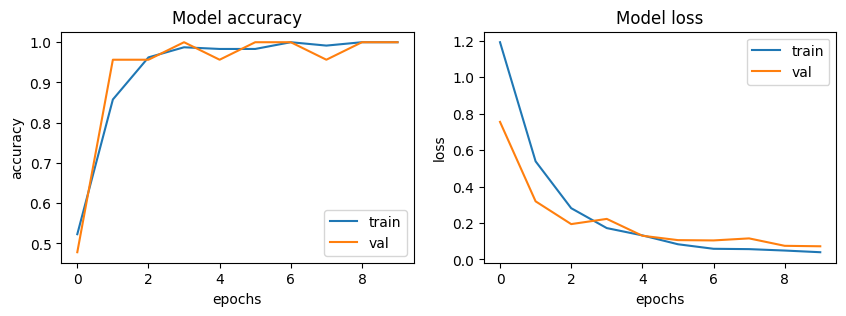

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [ ]:
from keras.models import load_model

classifier = load_model('/content/drive/MyDrive/GDFiles/DE-FaceRec/face_recog_vgg_v2.h5')

In [ ]:
import os
import cv2
import numpy as np
from os import listdir
from os.path import isfile, join
from google.colab.patches import cv2_imshow

In [ ]:
def read_face_dataset(file_path):
    face_dataset_dict = {}
    with open(file_path, 'r') as file:
        for line in file:
            key, value = line.strip().split(': ')
            face_dataset_dict[key] = value
    return face_dataset_dict

# Usage example
file_path = '/content/drive/MyDrive/GDFiles/DE-FaceRec/face_dataset_dict.txt'
face_dataset_dict = read_face_dataset(file_path)
print(face_dataset_dict)

{'[0]': 'Dev', '[1]': 'Divya', '[2]': 'Divyakumar', '[3]': 'Jabarson', '[4]': 'Mayur'}


In [ ]:
def draw_test(pred, im):
    face = face_dataset_dict[str(pred)]
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(im, 50, 0, 0, 0 ,cv2.BORDER_CONSTANT,value=BLACK)
    cv2.putText(expanded_image, face, (0, 40) , cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2)
    cv2_imshow(expanded_image)
    cv2.waitKey(0)

In [ ]:
def getRandomImage(path):
    """function loads a random images from a random folder in our test path """
    folders = list(filter(lambda x: os.path.isdir(os.path.join(path, x)), os.listdir(path)))
    random_directory = np.random.randint(0,len(folders))
    path_class = folders[random_directory]
    print("Class - " + str(path_class))
    file_path = path + path_class
    file_names = [f for f in listdir(file_path) if isfile(join(file_path, f))]
    random_file_index = np.random.randint(0,len(file_names))
    image_name = file_names[random_file_index]
    return cv2.imread(file_path+"/"+image_name)

Class - Divyakumar


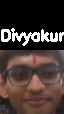

Class - Dev


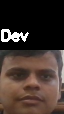

Class - Divyakumar


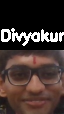

Class - Mayur


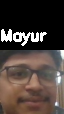

Class - Mayur


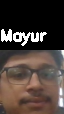

In [ ]:
for i in range(0,5):
  input_im = getRandomImage("/content/drive/MyDrive/GDFiles/DE-FaceRec/CroppedDataset/train/")
  input_original = input_im.copy()
  input_original = cv2.resize(input_original,None,fx=0.5,fy=0.5,interpolation=cv2.INTER_LINEAR)

  input_im = cv2.resize(input_im,(128,128),interpolation=cv2.INTER_LINEAR)
  input_im = input_im/255.
  input_im = input_im.reshape(1,128,128,3)

  res = np.argmax(classifier.predict(input_im,1,verbose=0),axis=1)

  draw_test(res,input_original)
  cv2.waitKey(0)

cv2.destroyAllWindows()

In [ ]:
from google.colab import files

# Specify the path to the trained model
model_path = "/content/drive/MyDrive/GDFiles/DE-FaceRec/face_recog_vgg_v2.h5"

# Use the files.download method to download the model
files.download(model_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import shutil

# Specify the path to the trained model
model_path = "/content/face_recog_vgg.h5"

# Specify the destination path in your Google Drive
destination_path = "/content/drive/MyDrive/GDFiles/DE-FaceRec/face_recog_vgg.h5"

# Copy the model file to Google Drive
shutil.copy(model_path, destination_path)

print(f"Model saved to {destination_path}")

Model saved to /content/drive/MyDrive/GDFiles/DE-FaceRec/face_recog_vgg.h5
